# **Zomato_EDA**

Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.♨️

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st


In [2]:
#Reading the dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/zomato.csv",encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Description:
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

- **Restaurant Id**: Unique identifier for each restaurant across various cities
- **Restaurant Name**: Name of the restaurant
- **Country Code**: Country where the restaurant is located
- **City**: City where the restaurant is situated
- **Address**: Address of the restaurant
- **Locality**: Location within the city
- **Locality Verbose**: Detailed description of the locality
- **Longitude**: Longitude coordinate of the restaurant's location
- **Latitude**: Latitude coordinate of the restaurant's location
- **Cuisines**: Cuisines offered by the restaurant
- **Average Cost for two**: Cost for two people in different currencies
- **Currency**: Currency of the country
- **Has Table booking**: Yes/No indicating if the restaurant offers table booking
- **Has Online delivery**: Yes/No indicating if the restaurant provides online delivery
- **Is delivering**: Yes/No indicating if the restaurant is currently delivering
- **Switch to order menu**: Yes/No indicating if there is an option to switch to the order menu
- **Price range**: Price range of the food
- **Aggregate Rating**: Average rating out of 5
- **Rating color**: Color representation based on the average rating
- **Rating text**: Textual representation based on the rating
- **Votes**: Number of ratings given by customers


**Basic Exploration & Data Cleaning**


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.shape

(9551, 21)

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("The categorical columns",categorical_columns)
print("The Numerical columns",numerical_columns)

The categorical columns ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
The Numerical columns ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


Missing Values:


In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
#getting the list of columns that has null values
Null_columns=[i for i in df.columns if df[i].isnull().sum()>0]
print(Null_columns)

['Cuisines']


In [10]:
print(type(plt))

<class 'module'>


In [11]:
plt.rcParams['figure.figsize'] = (8, 6)

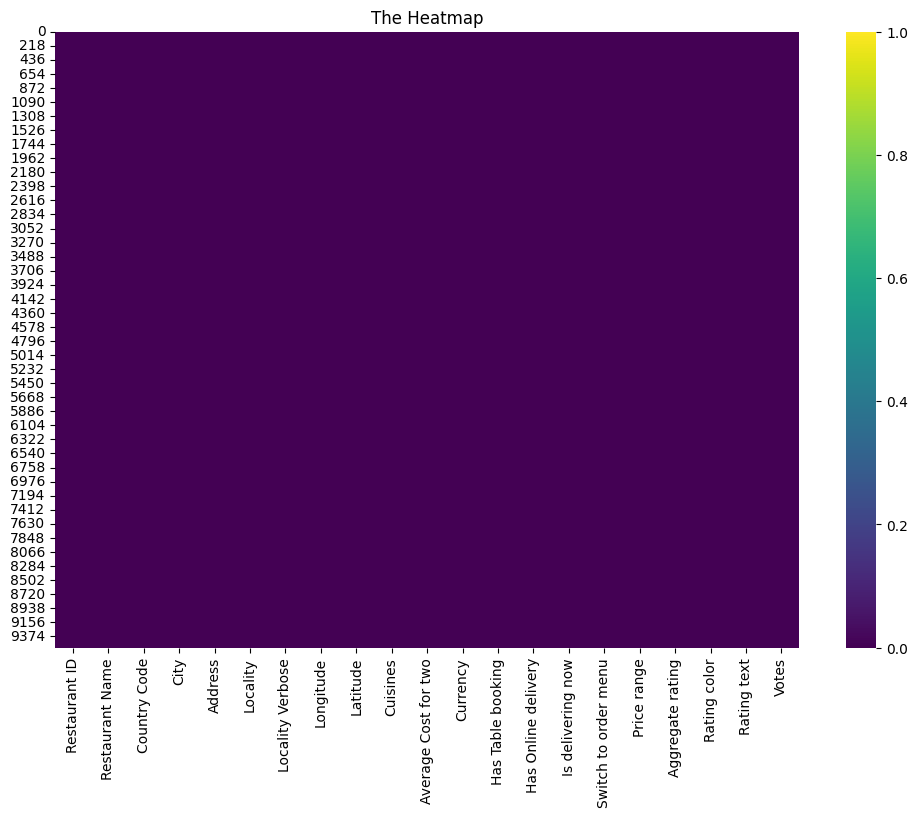

In [12]:
fig = plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('The Heatmap')
plt.show()

Observation:
We can see there some Null values present in Cusine Column.Will handle it

In [13]:
#We can drop the Null Values
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
df_country=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Country-Code.xlsx')

In [16]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


Lets merge this to get our Final df

In [17]:
final_df=pd.merge(df,df_country,on="Country Code",how="left")

In [18]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

**Outlier Analysis**

In [20]:
labels = list(final_df.describe().columns)[1:5]
print(labels)

['Country Code', 'Longitude', 'Latitude', 'Average Cost for two']


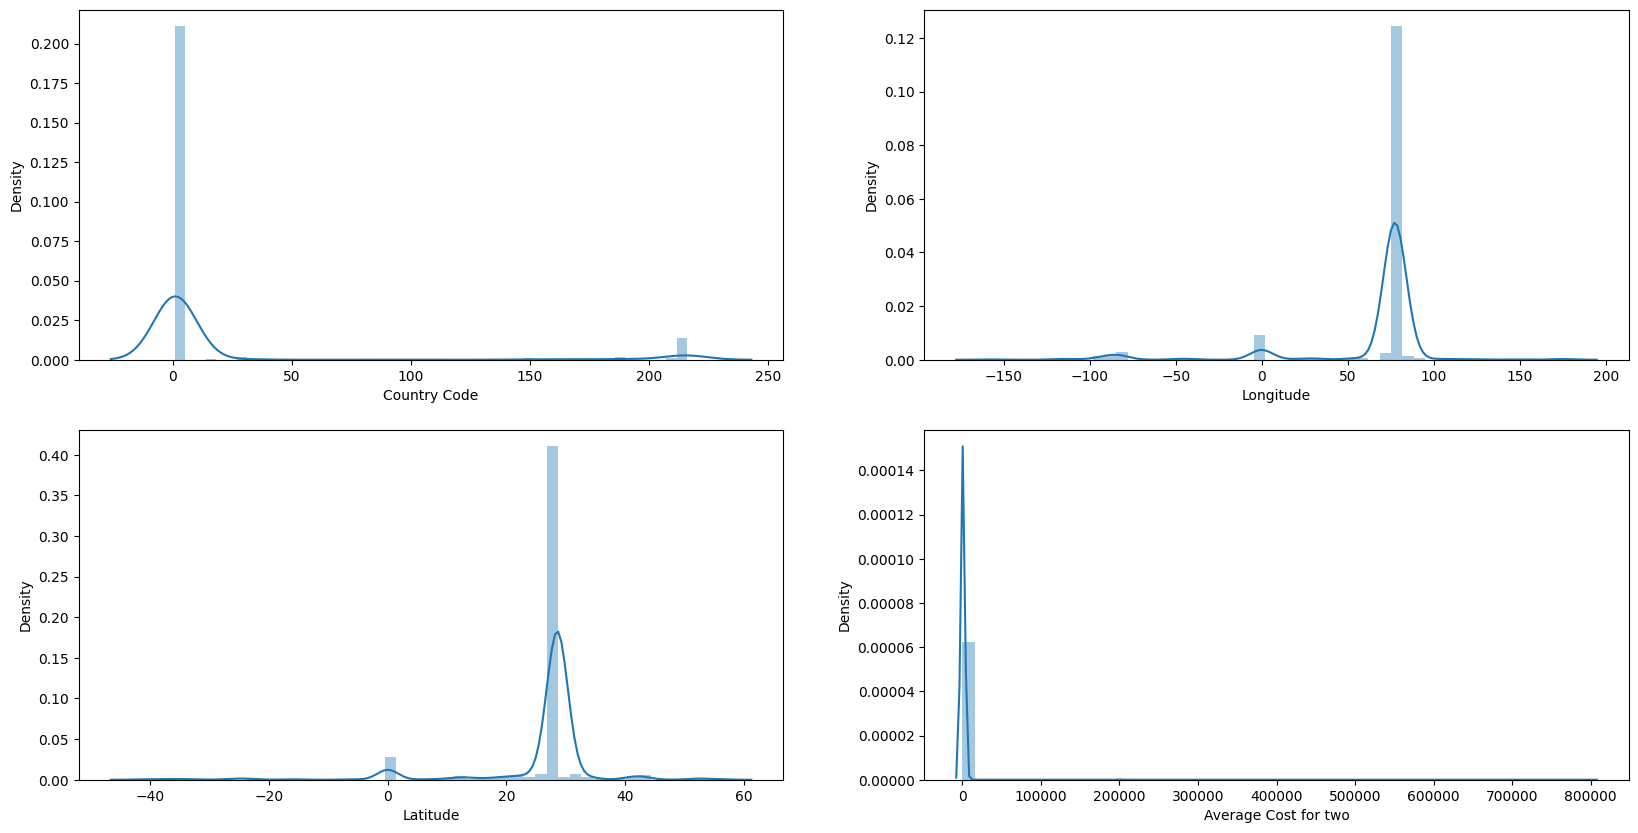

In [21]:
c=0
plt.figure(figsize=(20,10))
for i in labels:
    c=c+1
    plt.subplot(2,2,c)
    sns.distplot(df[i],kde=True,)

plt.show()

Z-Score Analysis to remove outliers

In [22]:

continous_df = final_df[list(final_df.describe().columns)[1:]]
continous_df.head()
z = np.abs(st.zscore(continous_df))
continous_df = continous_df[(z<3).all(axis=1)]
continous_df.shape

(8565, 7)

Observation:
We can see that datapoints have been reduced from 9551 to 8565 removing outliers with z-score > 3

In [23]:
final_df = final_df.iloc[continous_df.index]

In [24]:
final_df.shape

(8565, 22)

**Let's Get Insight from Visualization**


In [25]:

country_counts=final_df.Country.value_counts().values
country_index=final_df.Country.value_counts().index

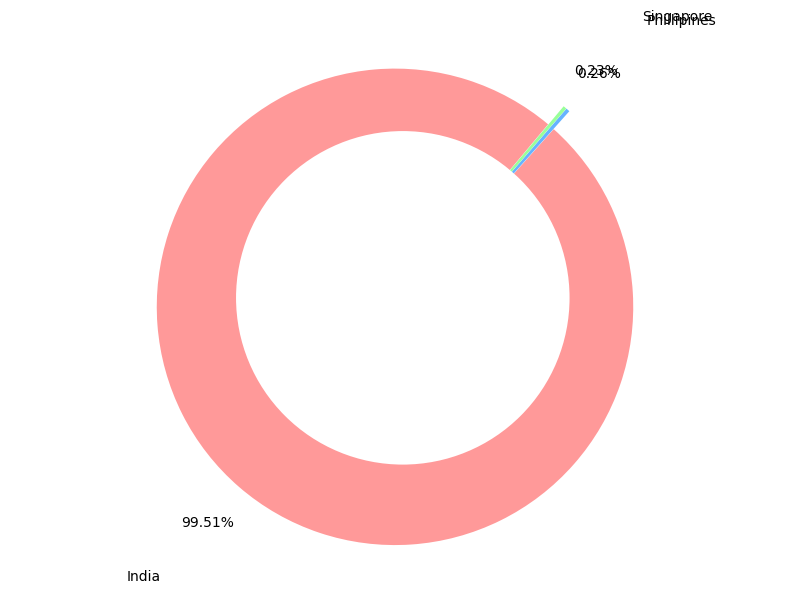

In [26]:
fig1, ax1 = plt.subplots()

colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
plt.pie(x=country_counts[:3],labels=country_index[0:3],autopct='%1.2f%%',
        radius=1,pctdistance=1.2,startangle=50,labeldistance=1.5,
        counterclock=True,explode=explode,colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

Observation:Zomato maximum records or transaction are from India After that philiphines and then Singapore

In [27]:
ratings=final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [28]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2139
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,26
6,2.3,Red,Poor,46
7,2.4,Red,Poor,82
8,2.5,Orange,Average,109
9,2.6,Orange,Average,190


Observation:<br>
When Rating is between 4.5 to 4.9---> Excellent<br>
When Rating are between 4.0 to 3.4--->very good<br>
when Rating is between 3.5 to 3.9----> good<br>
when Rating is between 3.0 to 3.4----> average<br>
when Rating is between 2.5 to 2.9----> average<br>
when Rating is between 2.0 to 2.4----> Poor<br>

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

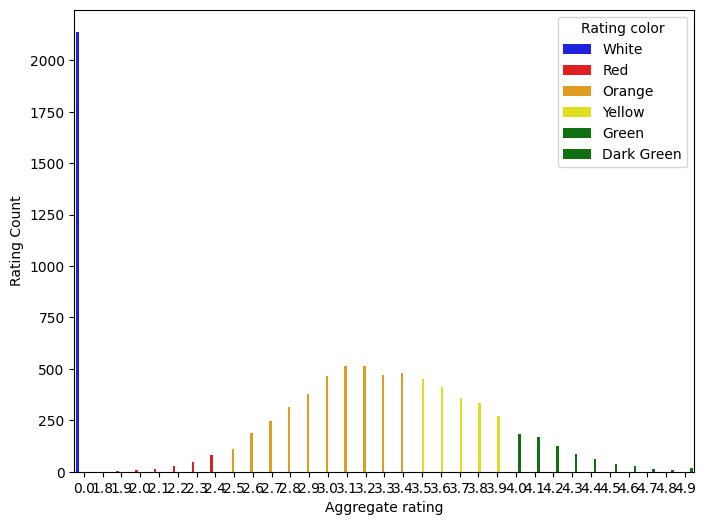

In [29]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

Observation:

Not Rated count is very high<br>
Maximum number of rating are between 2.5 to 3.4

<Axes: xlabel='Rating color', ylabel='count'>

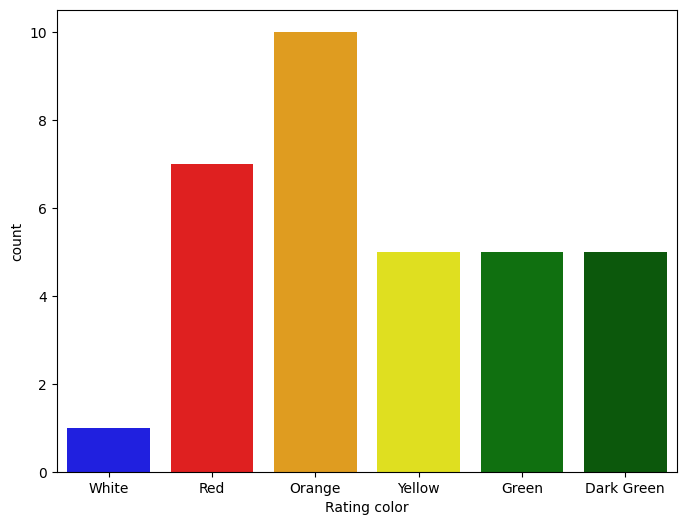

In [30]:
## Count plot
sns.countplot(x="Rating color",data=ratings,palette=['blue','red','orange','yellow','green','darkgreen'])

Observation:
Average Ratings are higher as compare to others

In [31]:
city_values=final_df.City.value_counts().values
city_labels=final_df.City.value_counts().index


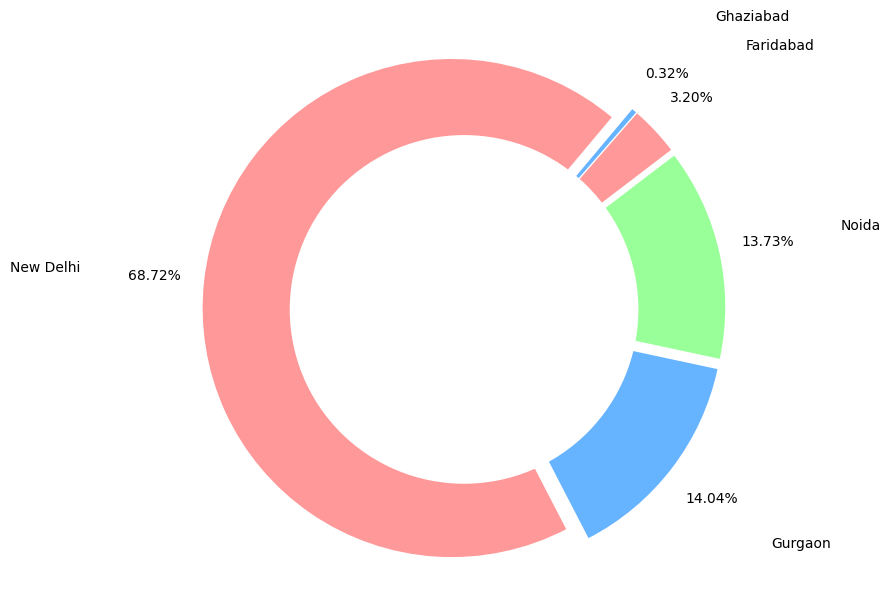

In [32]:
fig1, ax1 = plt.subplots()

colors = ['#ff9999','#66b3ff','#99ff99']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(x=city_values[:5],labels=city_labels[:5],autopct='%1.2f%%',
        radius=1,pctdistance=1.2,startangle=50,labeldistance=1.5,
        counterclock=True,explode=explode,colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

Questions:
Find the countries name that has given 0 rating ?

In [33]:
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,India,2139


Observation:
India got the maximun people who did not rate Zomato


Questions:
Find the different currency used in each countries?

In [34]:
#Find the countries name that has given 0 rating ?
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,India,Indian Rupees(Rs.),8502
1,New Zealand,NewZealand($),1
2,Phillipines,Botswana Pula(P),22
3,Qatar,Qatari Rial(QR),20
4,Singapore,Dollar($),20


Questions:
Which Countries do have online deliveries option?

In [35]:
final_df[final_df["Has Online delivery"]=="Yes"].groupby("Country").size().reset_index()

,Country,0
0,India,2367


In [36]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

,Has Online delivery,Country,0
0,No,India,6135
1,No,New Zealand,1
2,No,Phillipines,22
3,No,Qatar,20
4,No,Singapore,20
5,Yes,India,2367


Observation:
Online Deliveries are available in India

Question:What is the top cusines in each country?

In [37]:
cuisine_counts = final_df.groupby(['Country', 'Cuisines']).size().reset_index(name='count')

In [38]:
sorted_df=cuisine_counts.sort_values(['Country', 'count'], ascending=[True, False])
sorted_df

,Country,Cuisines,count
914,India,North Indian,929
937,India,"North Indian, Chinese",506
560,India,Fast Food,348
287,India,Chinese,340
1116,India,"North Indian, Mughlai",327
...,...,...,...
1400,Singapore,Italian,1
1401,Singapore,"Italian, French, Bakery, Cafe",1
1402,Singapore,"Singaporean, Australian, German",1
1403,Singapore,"Singaporean, Chinese, Seafood, Malay, Indian",1


In [39]:
top_cuisines = sorted_df.groupby('Country').head(1)


In [55]:
top_cuisines

,Country,Cuisines,count
914,India,North Indian,929
1352,New Zealand,Cafe,1
1361,Phillipines,Filipino,3
1375,Qatar,Indian,5
1398,Singapore,French,2


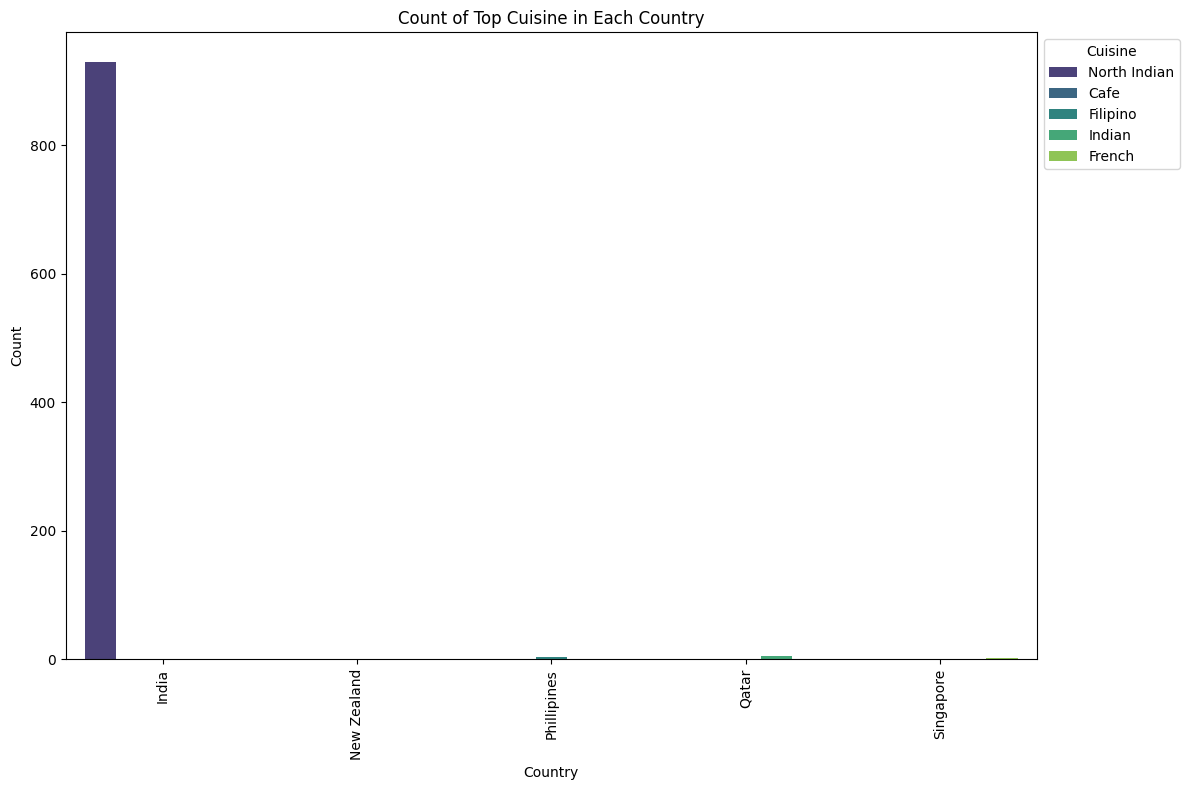

In [40]:
fig2=plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='count', hue='Cuisines', data=top_cuisines, palette='viridis')
plt.title('Count of Top Cuisine in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Cuisine', bbox_to_anchor=(1, 1), loc='upper left')  # Legend for cuisines
plt.tight_layout()
plt.show()

Observation:<br>
North Indian is the most favourite Cusine in India.<br>
And In Quatar we can see some Indian Cusine Too.

Question: What is the top 10 cusine in India?

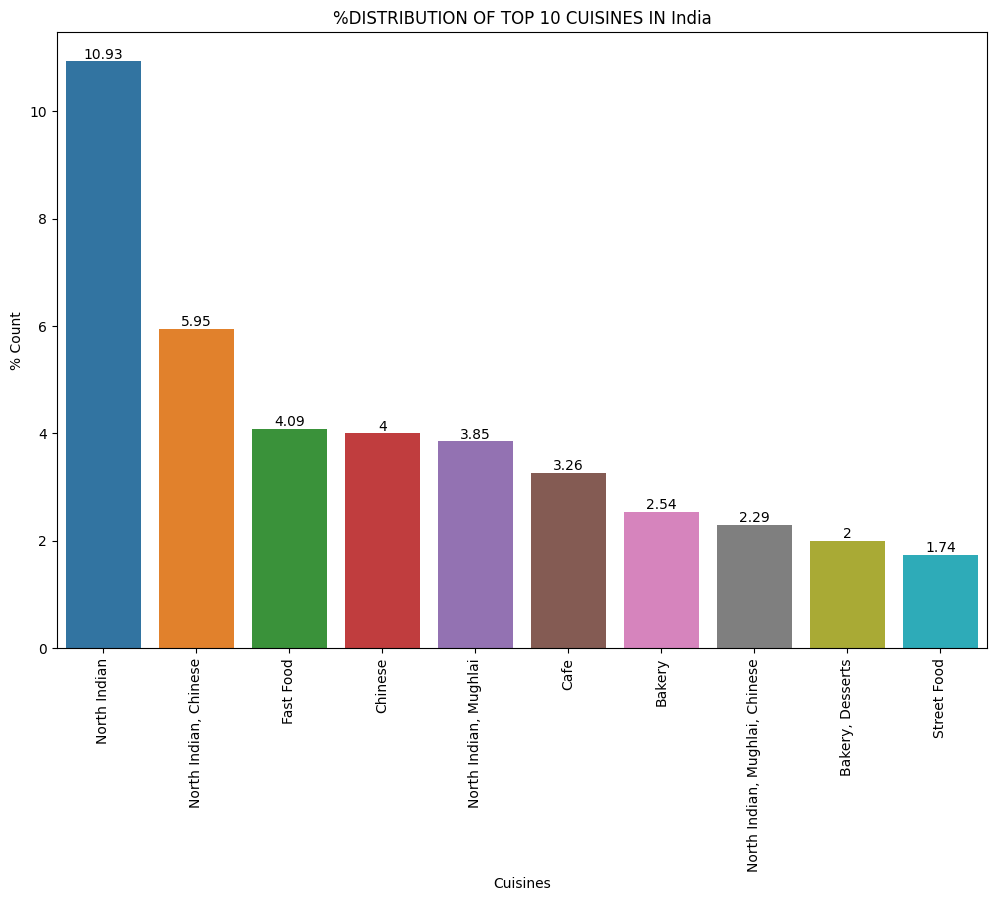

In [41]:
df = final_df[final_df['Country']=='India']
top_10 = df['Cuisines'].value_counts().nlargest(10)
total = len(df)
cuisine_type = np.array(top_10.keys())
cuisine_count = np.array(top_10.values)

cuisine_count = (cuisine_count/total)*100
cuisine_count = np.round(cuisine_count,decimals=2)


fig = plt.figure(figsize=(12,8))
plt.title(f'%DISTRIBUTION OF TOP 10 CUISINES IN India')
plt.xlabel('Cuisines')
plt.ylabel('% Count')
plt.xticks(rotation=90)
ax = sns.barplot(x=cuisine_type,y=cuisine_count)
#ax = sns.countplot(x='Cuisines',data=df,order=top_10.index)
ax.bar_label(ax.containers[0])
plt.show()

In [56]:
top_10

North Indian                      929
North Indian, Chinese             506
Fast Food                         348
Chinese                           340
North Indian, Mughlai             327
Cafe                              277
Bakery                            216
North Indian, Mughlai, Chinese    195
Bakery, Desserts                  170
Street Food                       148
Name: Cuisines, dtype: int64

In [42]:
final_df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Distibution of Avg Cost for Two across all Price range

In [43]:
final_df.groupby(['Country','Price range']).size().reset_index()



,Country,Price range,0
0,India,1,4289
1,India,2,2824
2,India,3,1029
3,India,4,360
4,New Zealand,3,1
5,Phillipines,2,1
6,Phillipines,3,12
7,Phillipines,4,9
8,Qatar,2,1
9,Qatar,3,5


In [44]:
grouped_data = final_df.groupby(['Country', 'Price range'])['Average Cost for two'].mean().reset_index()

In [45]:
grouped_data.head()

,Country,Price range,Average Cost for two
0,India,1,284.408953
1,India,2,619.022663
2,India,3,1243.440233
3,India,4,2601.527778
4,New Zealand,3,50.000000


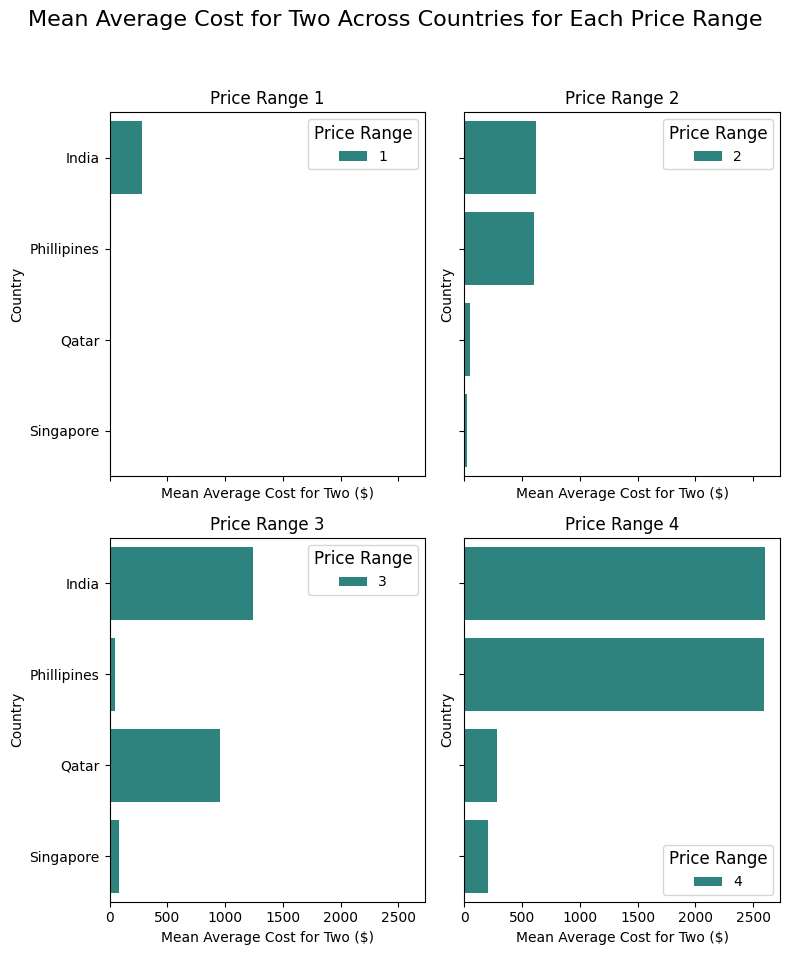

In [46]:
price_ranges = sorted(grouped_data['Price range'].unique())

# Create the subplots for each price range
fig, axs = plt.subplots(2, 2, figsize=(8, 10), sharex=True, sharey=True)

# Flatten the axes for easier indexing
axs = axs.ravel()

# Create the partitioned bar plots for each price range value
for i, price_range in enumerate(price_ranges):
    filtered_data = grouped_data[grouped_data['Price range'] == price_range]
    sns.barplot(x='Average Cost for two', y='Country', data=filtered_data, hue='Price range', palette='viridis', ax=axs[i])
    axs[i].set_title(f'Price Range {price_range}')
    axs[i].legend(title='Price Range', title_fontsize='large')
    axs[i].set_xlabel('Mean Average Cost for Two ($)')
    axs[i].set_ylabel('Country')

plt.suptitle('Mean Average Cost for Two Across Countries for Each Price Range', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Observation:<br>
40% of restaurants across geographies fall into the cheaper price range of 1, with 32%, 14%, 6% of restaurants falling into 2,3,4 respectively, this is because Indian price range 1 restaurants are dominating the dataset. Similar distribution can be found for Indian restaurants as well.

Overall Philippines, India have higher food prices(Price range 4) and Quatar,Singapore (price range 2) have lower prices.

Question:What is the top 10 expensive restaurants in India?

In [47]:
expensive_df=final_df[(final_df["Country"]=="India")&(final_df["Price range"]==4)].groupby("Restaurant Name").max()['Average Cost for two'].nlargest(10).reset_index()

In [49]:
import matplotlib.pyplot as plt

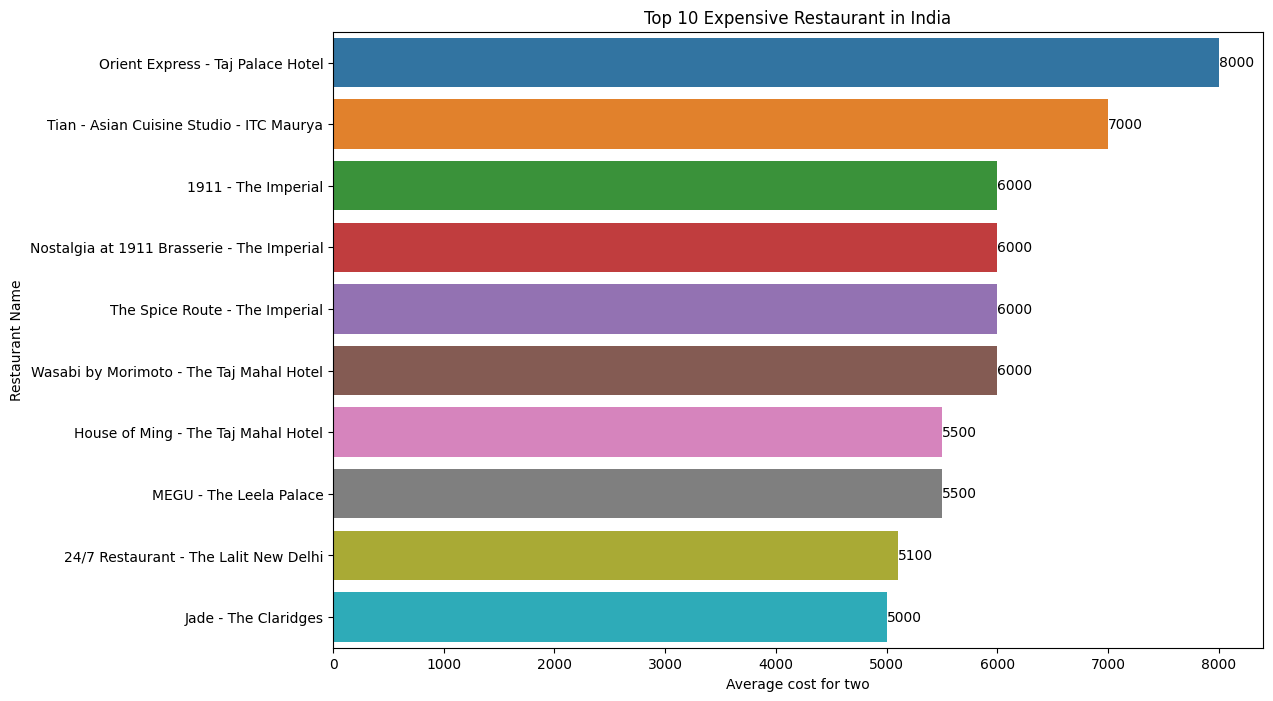

In [50]:
fig = plt.figure(figsize=(12,8))
ax=sns.barplot(x='Average Cost for two',y='Restaurant Name',data=expensive_df)
plt.title('Top 10 Expensive Restaurant in India')
plt.xlabel("Average cost for two")
plt.ylabel("Restaurant Name")
ax.bar_label(ax.containers[0])
plt.show()

In [51]:
cheap_df=final_df[(final_df["Country"]=="India")].groupby("Restaurant Name").min()['Average Cost for two'].nsmallest(10).reset_index()

In [52]:
cheap_df

,Restaurant Name,Average Cost for two
0,Atmosphere Grill Cafe Sheesha,0
1,BMG - All Day Dining,0
2,Chapter 1 Cafe,0
3,Deena Chat Bhandar,0
4,Sheroes Hangout,0
5,The BrewMaster,0
6,The Latitude - Radisson Blu,0
7,UrbanCrave,0
8,VNS Live Studio,0
9,Aggarwal Confectionary,50


Observation:<br>
In India Orient Express - Taj Palace Hotel	is the costliest restaraunt where average price for two is 8000.<br>
And the cheapest Hotel in India will be Aggarwal Confectionary where average price for two is just 50.

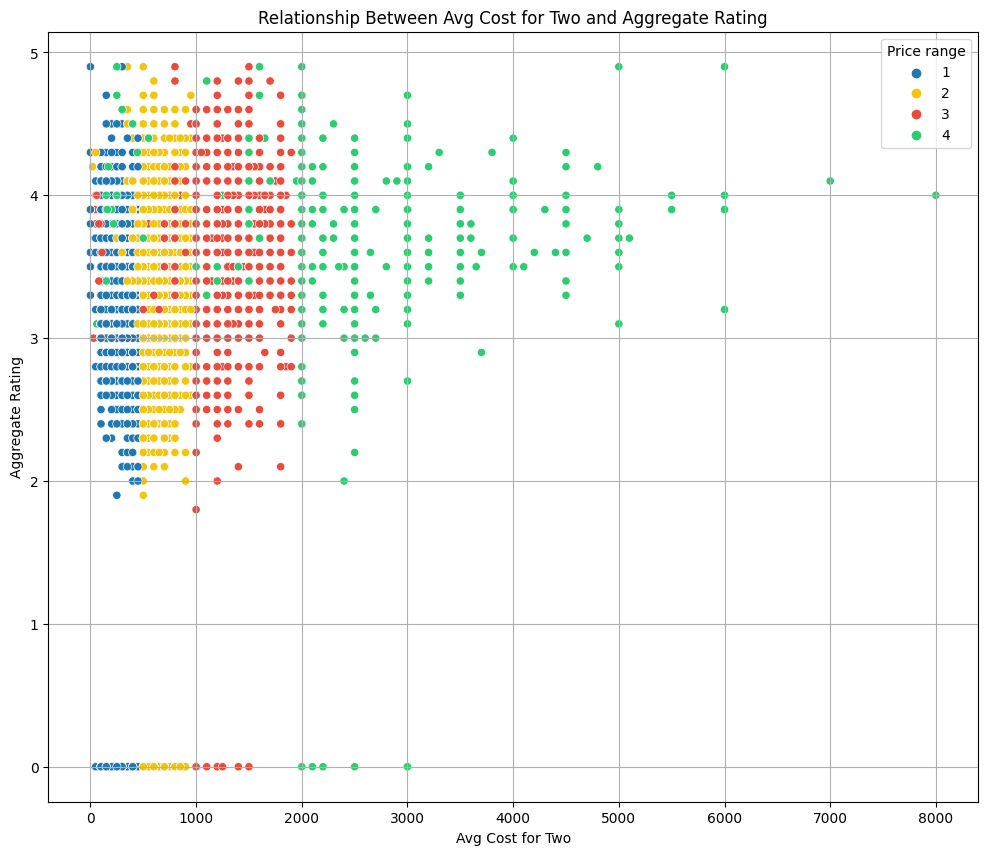

In [54]:
fig4 = plt.figure(figsize=(12,10))
sns.scatterplot(x='Average Cost for two',y='Aggregate rating',data=final_df,hue='Price range',palette  = ['#1f77b4','#f1c40f','#e74c3c','#2ecc71'],marker='o', facecolors='none')
plt.title('Relationship Between Avg Cost for Two and Aggregate Rating')
plt.xlabel('Avg Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid()
plt.show()

Observation:<br>
We can observe that expensive restaurants are rated highly whereas cheap restuarants are not rated that much

# Conclusion:
*  Zomato maximum records or transaction are from India After that philiphines and then Singapore
*  Zomato maximum records or transaction are from Gurghan from India<br>
    1.When Rating is between 4.5 to 4.9---> Excellent<br>
    2.When Rating are between 4.0 to 3.4--->very good<br>
    3.when Rating is between 3.5 to 3.9----> good<br>
    4.when Rating is between 2.9 to 3.4----> average<br>
    5.when Rating is between 2.0 to 2.4----> Poor<br>
*  Not Rated count is very high<br>
*  Maximum number of rating are between 2.5 to 3.4<br>
*  Average Ratings are higher as compare to others<br>
*  India got the maximun people who did not rate Zomato<br>
*  Online Deliveries are available in India<br>
*  The top cusine in differennt country are <br>
  1.New Zealand-Cafe.<br>
  2.Phillipines-Filipino.<br>
  3.Qatar-Indian.<br>
  4.Singapore-French.<br>
  5.India-North Indian.<br>
*  The top 10 cusine in India are North Indian, Chinese,Fast Food,Mughlai,Cafe,Bakery,Mughlai,Bakery,Desserts,StreetFood.  <br>     
*  40% of restaurants across geographies fall into the cheaper price range of 1, with 32%, 14%, 6% of restaurants falling into 2,3,4 respectively, this is because Indian price range 1 restaurants are dominating the dataset. Similar distribution can be found for Indian restaurants as well.

*  Overall Philippines, India have higher food prices(Price range 4) and Quatar,Singapore (price range 2) have lower prices.

*  In India Orient Express - Taj Palace Hotel	is the costliest restaraunt where average price for two is 8000.<br>
*  And the cheapest Hotel in India will be Aggarwal Confectionary where average price for two is just 50.

*  We can observe that expensive restaurants are rated highly whereas cheap restuarants are not rated that much